Seaborn

Seaborn est une bibliothèque Python pour la visualisation de données, spécialisée dans l'analyse statistique. Basée sur la bibliothèque Matplotlib, elle est totalement adaptée aux data frames de Pandas. Ainsi, au delà d'une interface visuellement améliorée, Seaborn permet de produire rapidement et intuitivement des graphiques statistiques de qualité.

De plus, Seaborn utilise des thèmes par défaut esthétiquement agréable, et permet de créer facilement ses propres palettes de couleurs. Seaborn permet ainsi d'apprendre à connaître un jeu de données de manière rapide et efficace.

Cependant, Seaborn a plus vocation à compléter la bibliothèque Matplotlib qu'à la remplacer.

In [ ]:

#import package

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
sns.set() #chrger le theme



In [2]:
#list de fct

#init---------------------------------------------------------------------------------
import seaborn as sns
sns.set() #chrger le theme



#Variable numerique (num)--------------------------------------------------------------

#histogramme/courbe
sns.distplot(df['A'],10,rug  = True, color = 'red')

#courbe de la densité estimée
sns.kdeplot(df['A'], shade=True, cut = 0);



#Variable qualitative (var txt)------------------------------------------------------ 
# le nombre ds 'li2' en fonction de li
sns.countplot(df['li2'],hue = df['li'])
#hue : colorés en fonction de la variable 'li'



#Relation entre plusieurs variables quantitatives partie 1 (num)----------------------
#Analyse statistique

#nuage de point
sns.relplot(x = 'A',y= 'B', data = df, hue = 'li' )
#hue : colorés en fonction de la variable 'li'

#courbe 
sns.relplot(x = 'A', y = 'B', data = df[df['A']>0], kind = 'line' ) 

#plusieur param
sns.relplot(x= 'A' , y = 'D',data = df, hue = 'li',style = 'li2', 
            col = 'li2' , row='li2', 
            height=3, kind="line")
#hue : styles et de couleurs
#style : style par rapport a une var 
#col:ligne par rapport a une col 
#row: ligne par rapport a une var 
#height
#kind : Line ou scatter par defaut



#Relation entre plusieurs variables quantitatives partie 2(num)------------------------

#Pour vérifier une hypothèse de linéarité entre deux variables
# = une droite de régression
sns.lmplot(x='A', y='B' , data = df)
sns.lmplot(x='A', y='B' , data = df,lowess = True)
sns.lmplot(x='A', y='B' , data = df,order = 2)
#hue = 'coulour / ', 
#lowess =  régression locale 
#order = régression quadratique



#Relation de correlation entre var quntitative (num) -----------------------------------------------------------

#correlation courbe
#les nuages de points entre chaque chaque paire de variables 
sns.pairplot(df)
sns.pairplot(df, diag_kind = 'kde')
#diag_kind : hist ou kde


#correlation numerique en tableau
cor = df.corr()
fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(cor, annot= True, ax= ax, cmap="coolwarm");



#Analyse avec variable(s) qualitative(s) (num/txt) -----------------------------------------------------------
#relation entre une variable qualitative et une variable quantitative, 

#catplot point 
sns.catplot(x="A", y="li2" , data=df,kind = "swarm",hue='li2');


#la boîte à moustache catplot
sns.catplot(x="li2", y="A", kind="box", col='li2', data=df);
#col puur chaque var unique
#kind box boite a stache
#hue couleur


#catplot blob
sns.catplot(x="li2", y="A", kind="violin", data=df)
#hue="conf", split=True
#hue couleur
#split separe en deux si valeur binaire


#catplot bougie
sns.catplot(x="li2", y="A", kind="bar", data=df)


#association de 2 type de courbes (1 est catplot)
g = sns.catplot(x="li2", y="A", kind="violin", inner=None, data=df)
sns.swarmplot(x="li2", y="A", size=3, color='k', alpha=0.7, data=df, ax=g.ax)



Graphiques multiples -----------------------------------------------------------------------------------------------

#FacetGrid
#courbe 1 var A pour chaque val unique de li2
g = sns.FacetGrid(df, col="li2")
g.map(plt.hist, "A")


#FacetGrid
#Courbe 2 Var (x,y) pour chque element des listes
#trace une grille pour tout li et li2
#avec dans chaque grille x = A et y = B
g = sns.FacetGrid(df, col="li2", row ='li', hue='li2')
g.map(plt.scatter, "A", "B", alpha=0.7)


#PairGrid
#PairGrid : couple de variables et 
#permet de visualiser les relations 
#entre chaque paire de variables
g = sns.PairGrid(df, hue= 'li2')
g.map(plt.scatter, alpha=0.6)
g.add_legend()


#densité bivariée estimée entre chaque paire de variable
g = sns.PairGrid(df.iloc[:,1:6])
g.map_diag(sns.kdeplot)
g.map_offdiag(sns.kdeplot, n_levels=6)





In [85]:
#declaration du df
df = pd.DataFrame( np.random.rand (13,4)*100,columns = ['A','B','C','D'])

li = []
li2 = []
lettre=('AZERTYUIOPQSD')
for i in lettre :
    li.append ( i)

lettre=('nnnnnmmmkkkkk')
for i in lettre :
    li2.append ( i)
    
df['li'] = li
df['li2'] = li2
df.head()


,A,B,C,D,li,li2
0,69.147552,5.105196,51.907671,41.437811,A,n
1,95.407232,41.066302,11.742158,46.169366,Z,n
2,96.754487,91.537209,67.046986,67.552367,E,n
3,33.044118,70.553684,43.902483,89.471964,R,n
4,76.758216,35.744878,45.444764,43.814006,T,n


#Variable continue-------------------------------

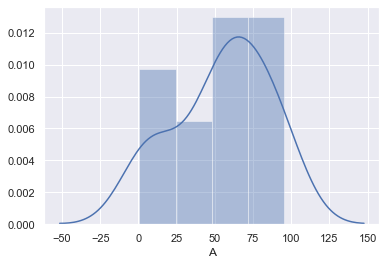

In [77]:
##histogramme/courbe 
sns.distplot(df['A']);
#ou 
#sns.distplot(df['A'],3); #car nbr de col en auto

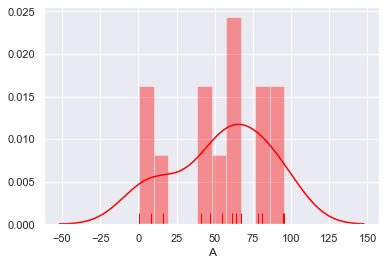

In [78]:
#histogramme/courbe
sns.distplot(df['A'],10,rug  = True, color = 'red')

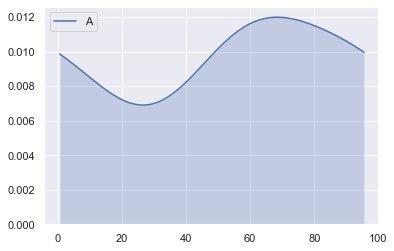

In [79]:
#courbe de la densité estimée
#colonne age =>courbe age de la population
sns.kdeplot(df['A'], shade=True, cut = 0);
#
#shade : colorer l'air sous la courbe
#cut : couper les extrémités de la courbe 
#vertical : affichage
#

#Variable qualitative------------------- (var txt)

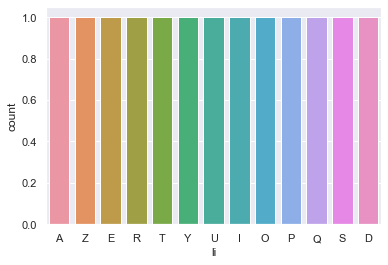

In [74]:
sns.countplot(df['li'])

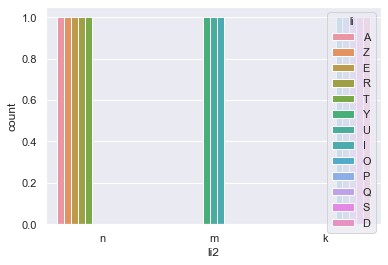

In [123]:
# le nombre ds 'li' en fonction de li2
sns.countplot(df['li2'],hue = df['li'])
#

Relation entre plusieurs variables quantitatives partie 1------

Analyse statistique

représenter visuellement la relation entre deux variables, 
les méthodes les plus fréquentes 
sont les nuages de points et les tracés de courbes.

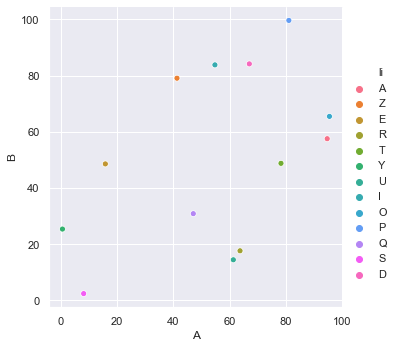

In [81]:
#nuage de point

sns.relplot(x = 'A',y= 'B', data = df, hue = 'li' )
#hue : colorés en fonction de la variable 'li'

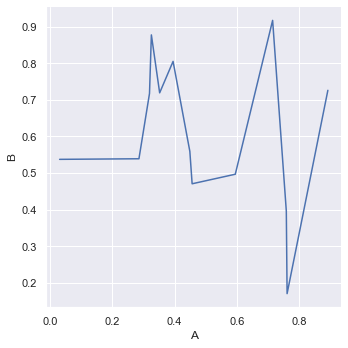

In [53]:
#courbe 
sns.relplot(x = 'A', y = 'B', data = df[df['A']>0], kind = 'line' ) 


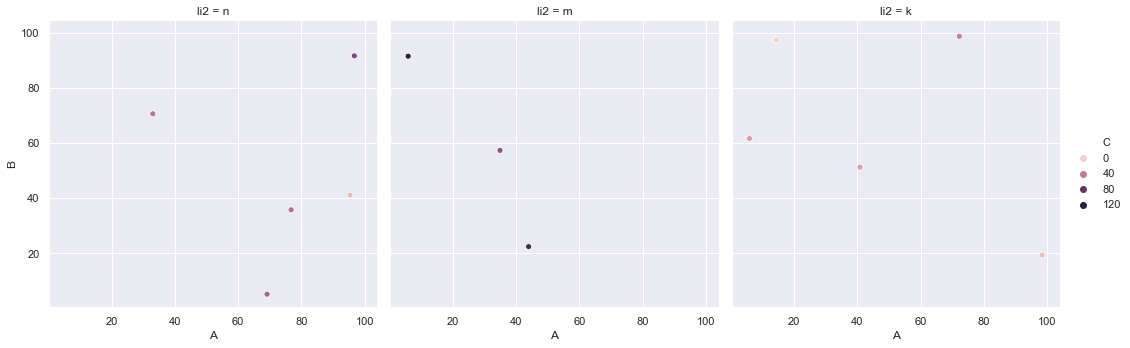

In [86]:
#afficher des courbe pour chaque type (unique) dans une col
sns.relplot(x="A", y="B", hue="C", col="li2", data=df);

#col: var diff ( 3 unique) = 3 traces 
#hue : code couleur 

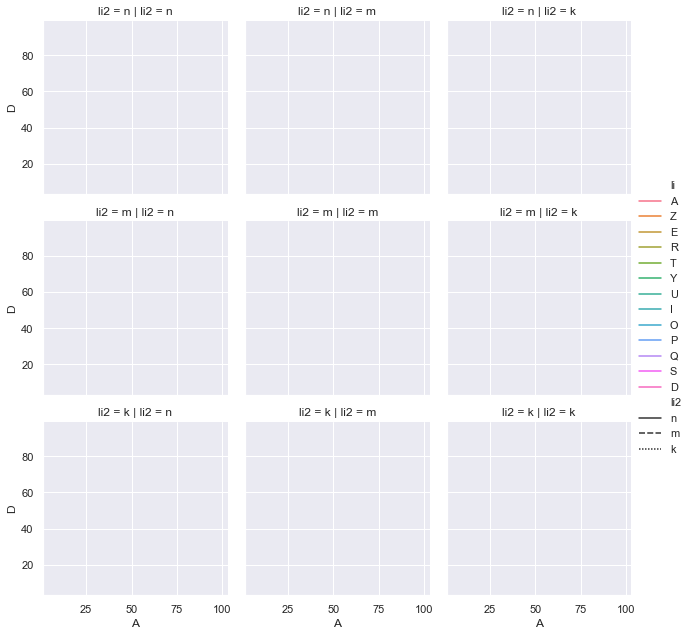

In [89]:
sns.relplot(x= 'A' , y = 'D',data = df, hue = 'li',style = 'li2', col = 'li2' , row='li2', 
            height=3, kind="line")
#hue : styles et de couleurs
#style : style par rapport a une var 
#col:ligne par rapport a une col 
#row: ligne par rapport a une var 
#height
#kind : Line ou scatter par defaut

Relation entre plusieurs variables quantitatives partie 2------

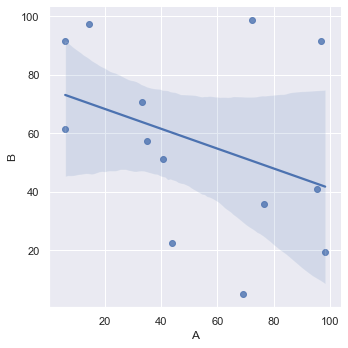

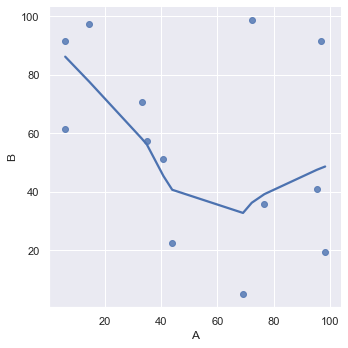

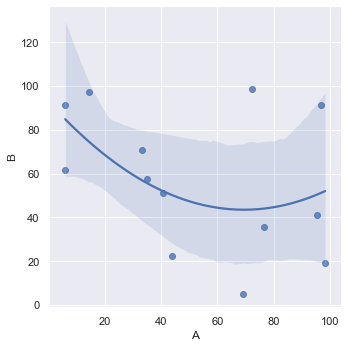

In [95]:
#Pour vérifier une hypothèse de linéarité entre deux variables
# = une droite de régression

sns.lmplot(x='A', y='B' , data = df)
sns.lmplot(x='A', y='B' , data = df,lowess = True)
sns.lmplot(x='A', y='B' , data = df,order = 2)
#hue = 'coulour / ', 
#lowess =  régression locale 
#order = régression quadratique

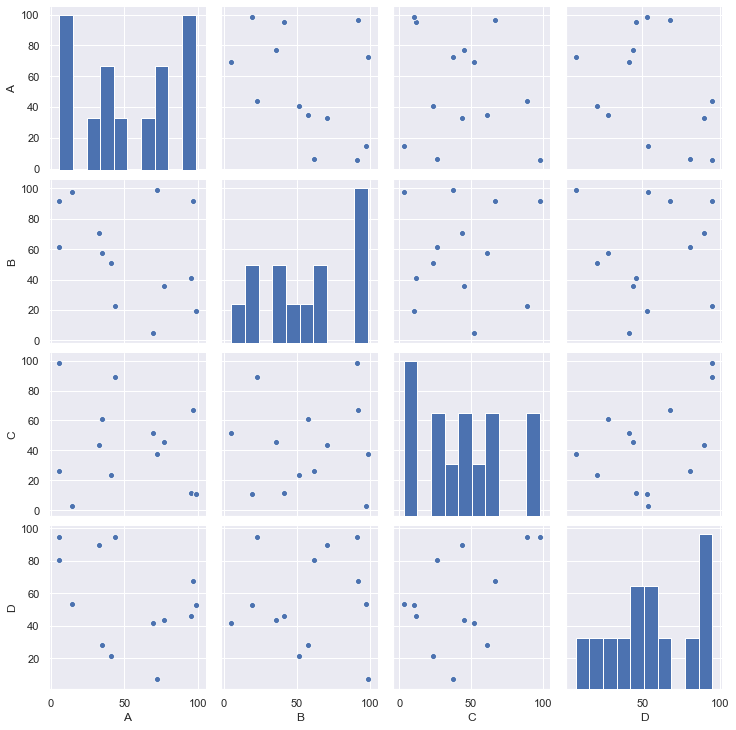

In [101]:
#correlation courbe
#les nuages de points entre chaque chaque paire de variables 
 
sns.pairplot(df)
#sns.pairplot(df, diag_kind = 'kde')

#diag_kind : hist ou kde

In [100]:
df.head()

,A,B,C,D,li,li2
0,69.147552,5.105196,51.907671,41.437811,A,n
1,95.407232,41.066302,11.742158,46.169366,Z,n
2,96.754487,91.537209,67.046986,67.552367,E,n
3,33.044118,70.553684,43.902483,89.471964,R,n
4,76.758216,35.744878,45.444764,43.814006,T,n


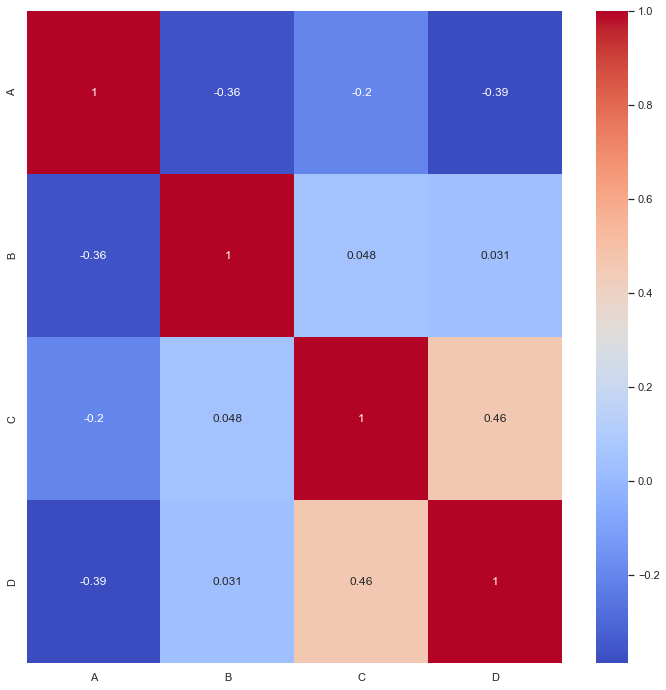

In [102]:
#correlation numerique
cor = df.corr()

fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(cor, annot= True, ax= ax, cmap="coolwarm");

Analyse avec variable(s) qualitative(s)

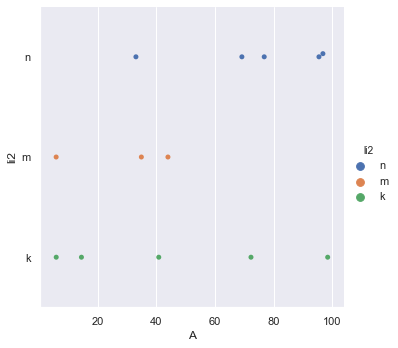

In [107]:
#relation entre 
#une variable qualitative et une variable quantitative, 
#catplot
sns.catplot(x="A", y="li2" , data=df,kind = "swarm",hue='li2');

#hue couleur
#kind point ordonné mieux

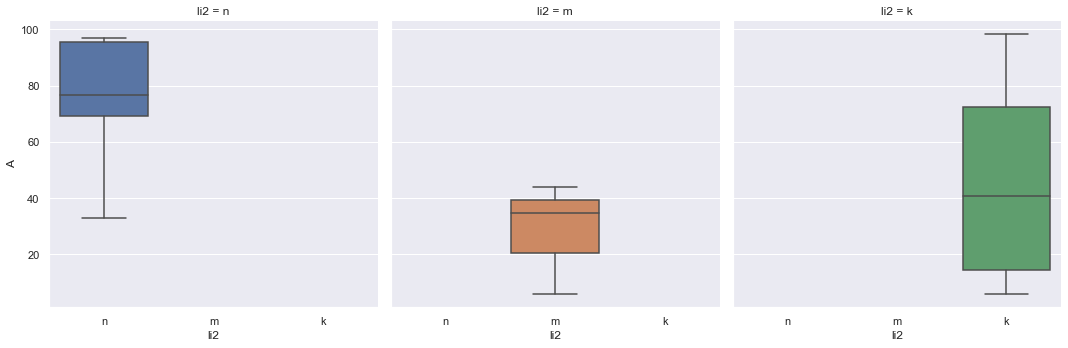

In [109]:
#la boîte à moustache catplot
sns.catplot(x="li2", y="A", kind="box", col='li2', data=df);
#col puur chaque var unique
#kind box boite a stache
#hue couleur

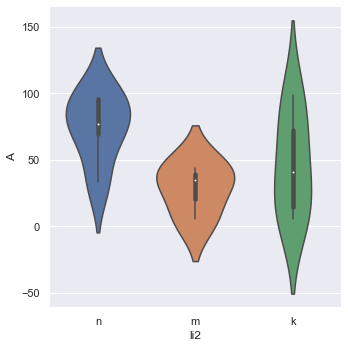

In [114]:
#autre forme  catplot

sns.catplot(x="li2", y="A", kind="violin", data=df)
#hue="conf", split=True
#hue couleur
#split separe en deux si valeur binaire

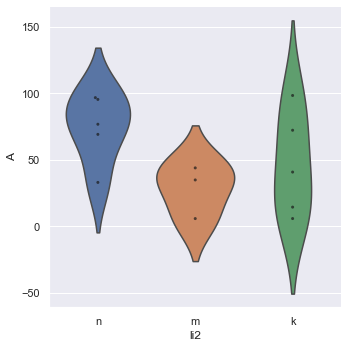

In [115]:
#association de 2 type de courbes (1 est catplot)

g = sns.catplot(x="li2", y="A", kind="violin", inner=None, data=df)
sns.swarmplot(x="li2", y="A", size=3, color='k', alpha=0.7, data=df, ax=g.ax)

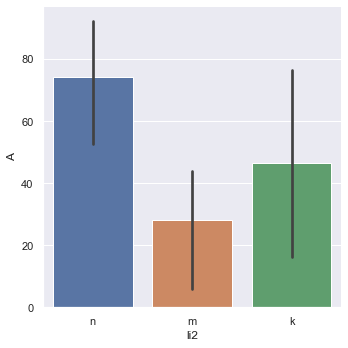

In [116]:
#autre type de courbe catplot

sns.catplot(x="li2", y="A", kind="bar", data=df)

Graphiques multiples

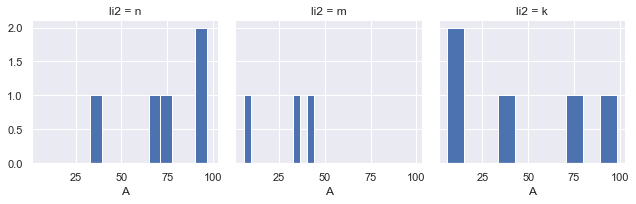

In [118]:
#courbe 1 var A pour chaque val unique de li2
#FacetGrid
g = sns.FacetGrid(df, col="li2")
g.map(plt.hist, "A")

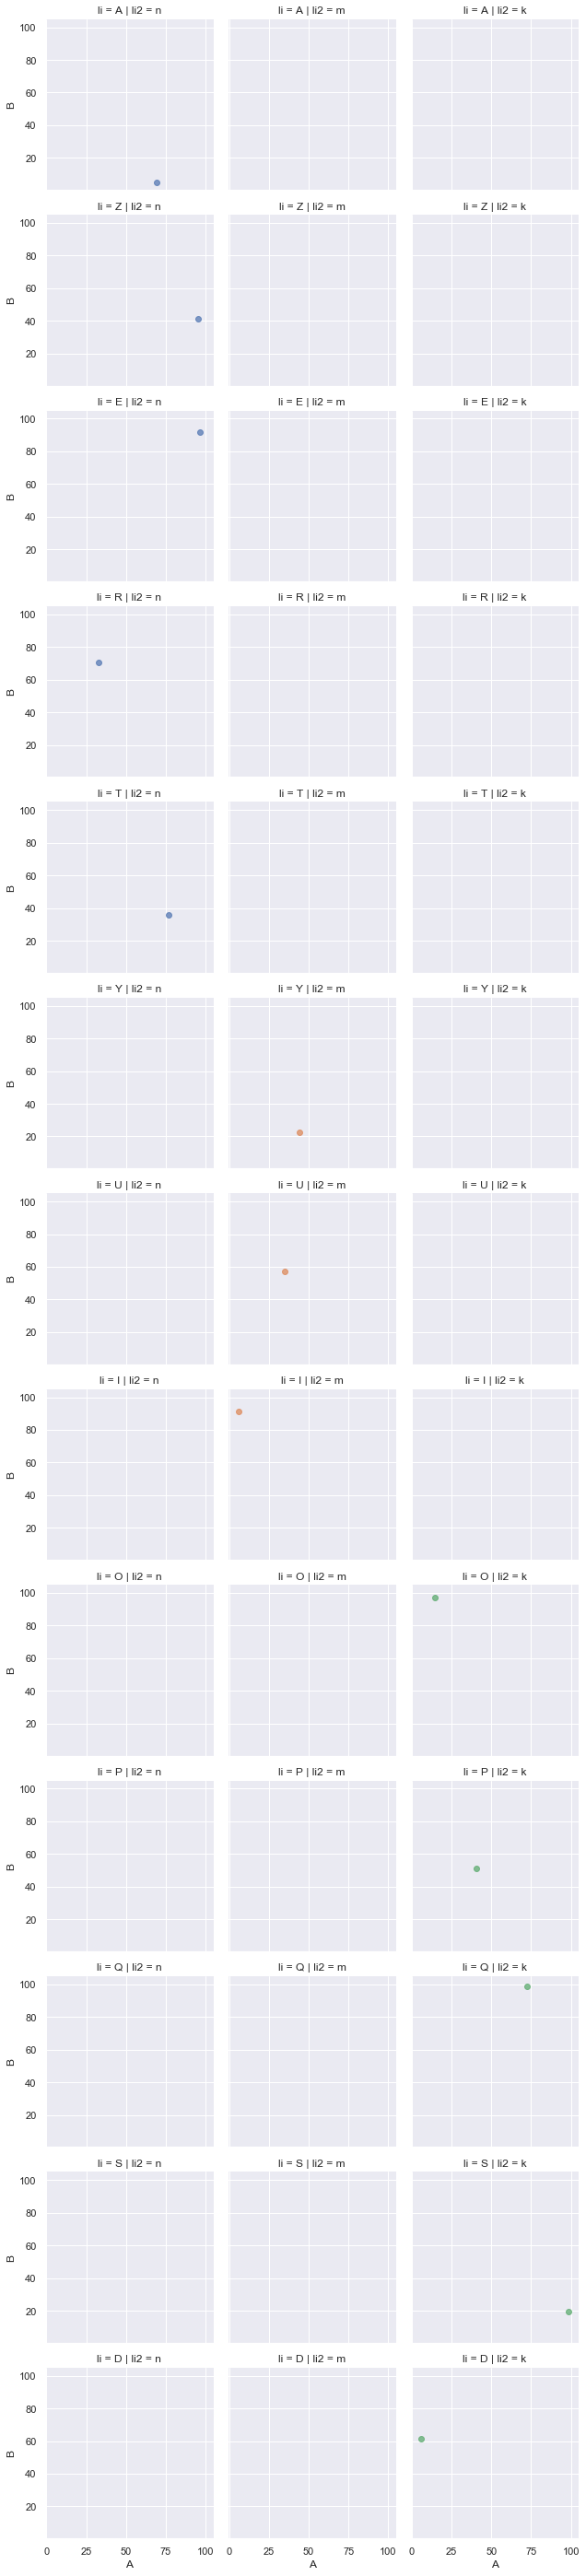

In [120]:
#Courbe 2 Var (x,y) pour chque element des listes
#trace une grille pour tout li et li2
#avec dans chaque grille x = A et y = B
#FacetGrid

g = sns.FacetGrid(df, col="li2", row ='li', hue='li2')
g.map(plt.scatter, "A", "B", alpha=0.7)

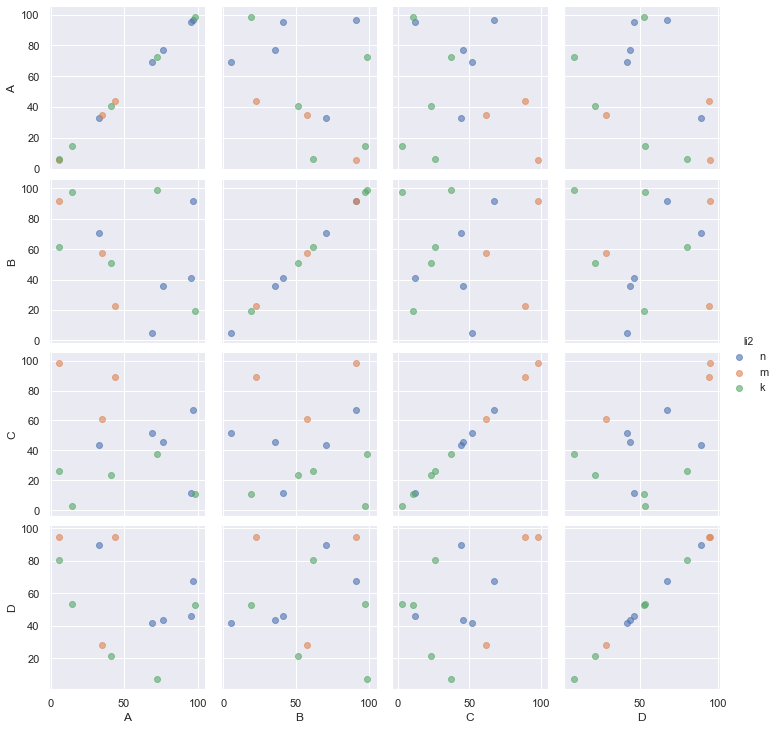

In [121]:
#PairGrid
#PairGrid : couple de variables et 
#permet de visualiser les relations 
#entre chaque paire de variables

g = sns.PairGrid(df, hue= 'li2')
g.map(plt.scatter, alpha=0.6)
g.add_legend()



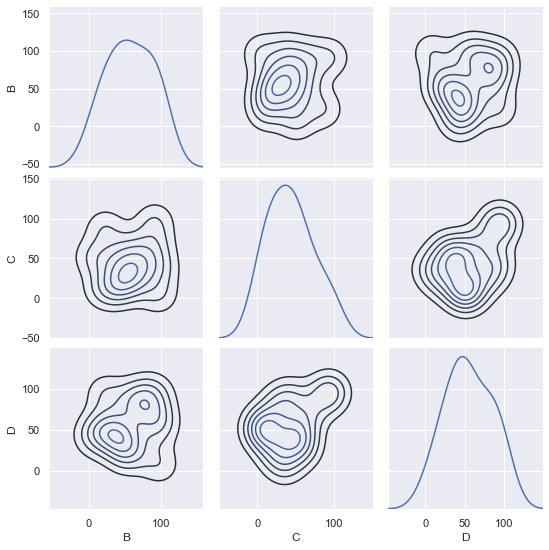

In [122]:
#densité bivariée estimée entre chaque paire de variable
g = sns.PairGrid(df.iloc[:,1:6])
g.map_diag(sns.kdeplot)
g.map_offdiag(sns.kdeplot, n_levels=6)